## Student Cohort Demographics

My first question about the data is to determine what general information can be inferred from the given cohort.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

student_data = pd.read_csv('./../1.Data/student_data.csv')

In [3]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### A. Routine Data Quality Checks

Before any inference, I want to ensure that the data is clean, and no pre-processing is required.

In [4]:

# 1. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)
# 2. Check for duplicates in the data and remove them
# 3. Check if all the data types have been correctly interpreted by Python. If not, then change them accordingly.


#1. Missing Values
missing_values = student_data.isnull().sum()
print(missing_values)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
#2. Duplicates
duplicate_rows = student_data[student_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 35 columns]


In [6]:
#3. Data Types
print(student_data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

#### 2. Cohort Description

In [7]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


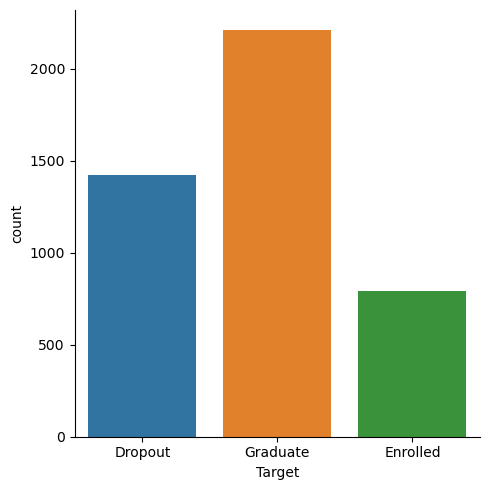

In [8]:
sns.color_palette("rocket")
sns.catplot(student_data, x='Target', kind='count')
plt.show()

In [9]:
student_data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

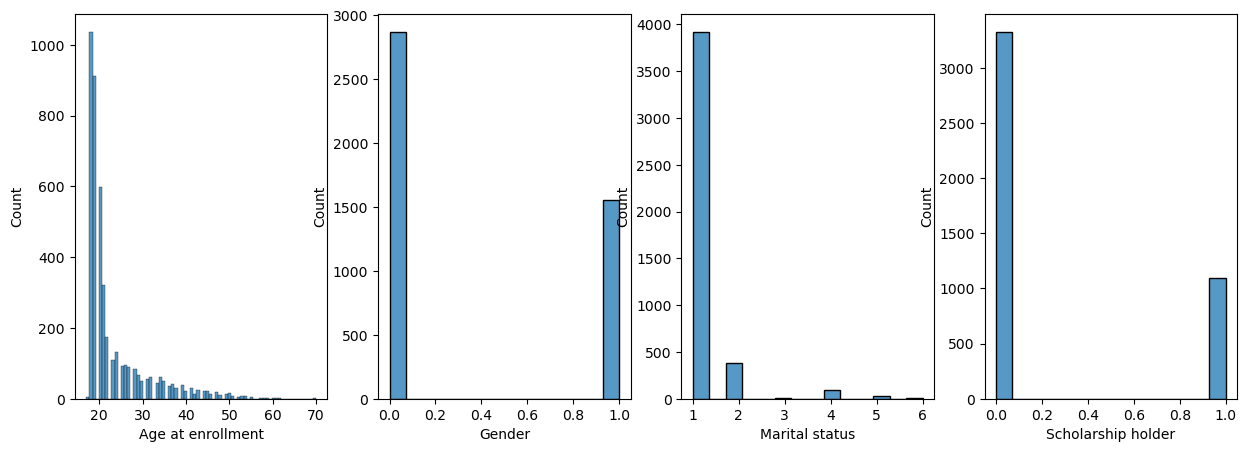

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
sns.histplot(student_data, x='Age at enrollment', ax=ax1)
sns.histplot(student_data, x='Gender', ax=ax2)
sns.histplot(student_data, x='Marital status', ax=ax3)
sns.histplot(student_data, x='Scholarship holder', ax=ax4)
plt.show()

#### 3. Data Manipulation

Since the data represents only a snapshot in time, "enrolled" students may either drop out or graduate. For the purpose of creating a binary comparison (e.g., students who graduate vs. students who drop out) all values pertaining to currently enrolled students will be removed for the current analysis.

In [11]:
student_data_filt = student_data[student_data.Target != 'Enrolled'].copy(deep=False)

In [12]:
student_data_filt['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [13]:
#replace target value with 0 and 1: 1 representing dropout and 0 representing graduate
student_data_filt['Target'].replace({'Dropout': 1, 'Graduate': 0}, inplace=True)

In [29]:
plt.rcParams['figure.figsize']= [40,40]

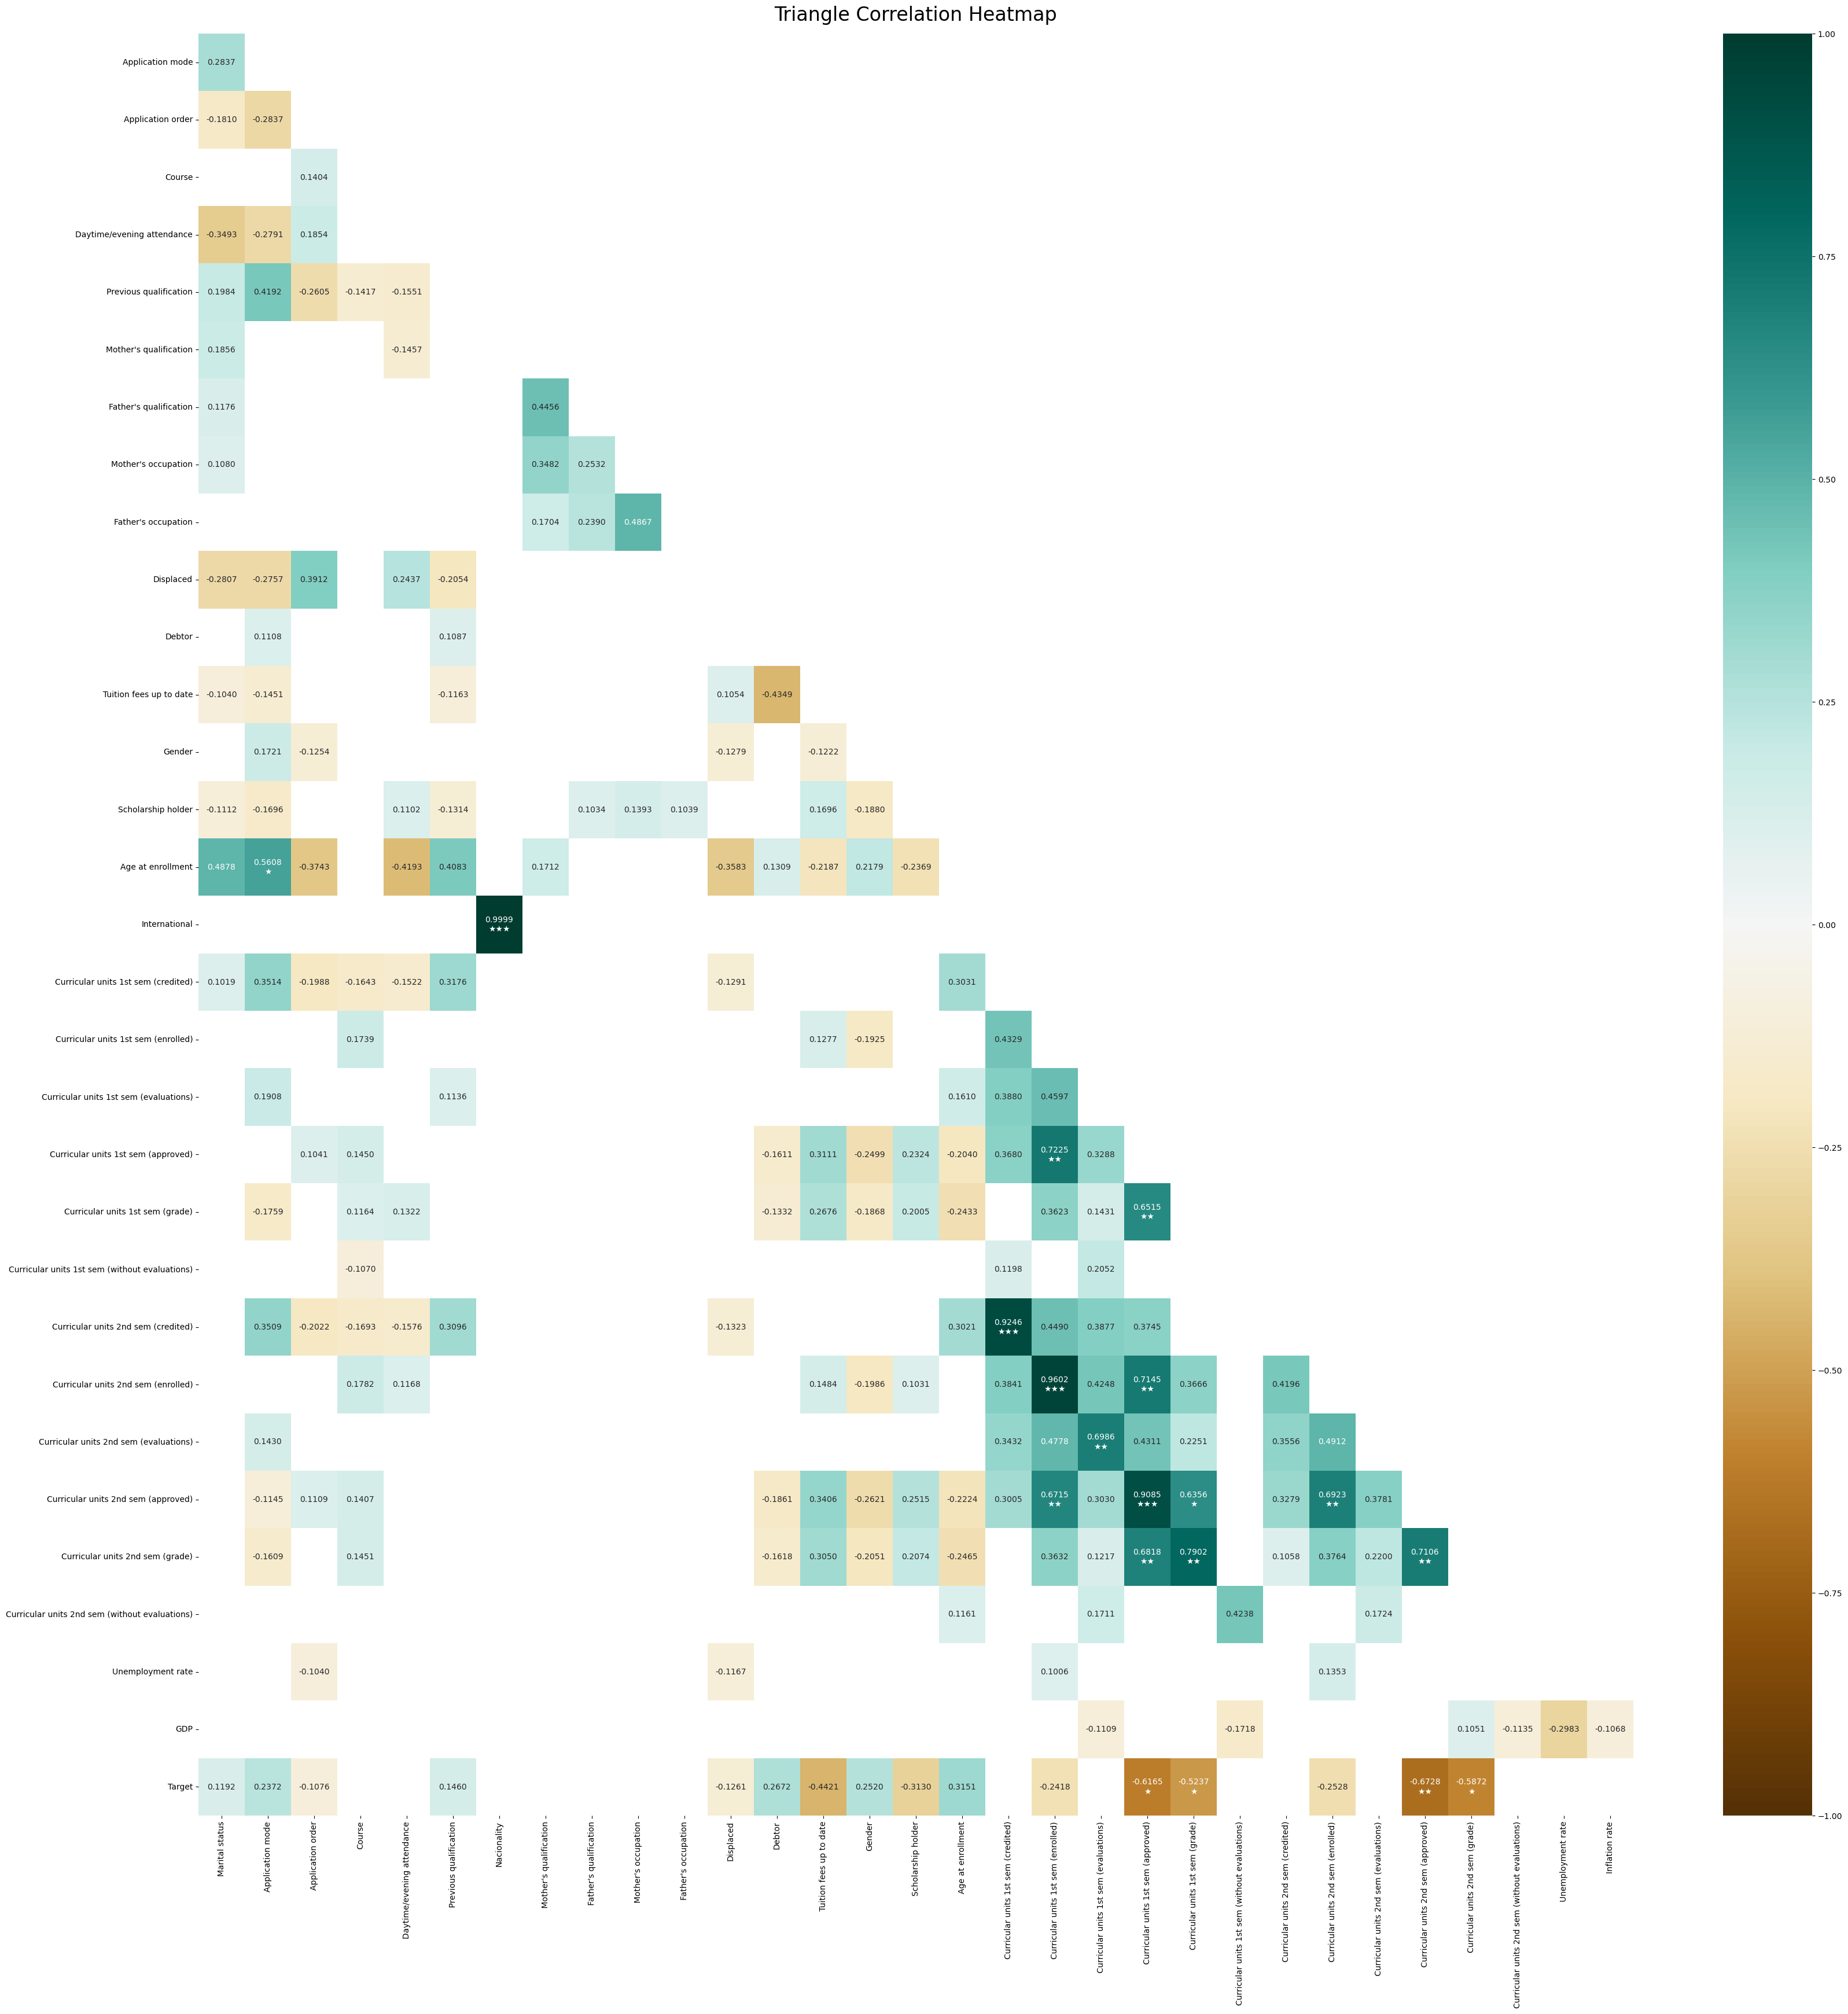

In [30]:
#spearman's correlation used for strength and direction of monotonic relationship, even if not linear
corr = student_data_filt.corr(method='spearman') 
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.1
extreme_1 = 0.5  # show with a star
extreme_2 = 0.65  # show with a second star
extreme_3 = 0.80  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 24}, pad=16)
plt.show()

In [31]:
#pearson's correlation used for linear relationship

target_corr = student_data_filt.corr(method='pearson')['Target'].sort_values(ascending=False) 
top_target_corr = target_corr[((target_corr > 0.10) | (target_corr < -0.10)) & (target_corr != 1)]

for col in student_data_filt.columns:
    if col in list(top_target_corr.index):
        corr, p_val = pearsonr(student_data_filt[col], student_data_filt['Target'])
        print(f"{col}: correlation coefficient: {corr:.4f}")

Marital status: correlation coefficient: 0.1005
Application mode: correlation coefficient: 0.2339
Previous qualification: correlation coefficient: 0.1028
Displaced: correlation coefficient: -0.1261
Debtor: correlation coefficient: 0.2672
Tuition fees up to date: correlation coefficient: -0.4421
Gender: correlation coefficient: 0.2520
Scholarship holder: correlation coefficient: -0.3130
Age at enrollment: correlation coefficient: 0.2672
Curricular units 1st sem (enrolled): correlation coefficient: -0.1611
Curricular units 1st sem (approved): correlation coefficient: -0.5549
Curricular units 1st sem (grade): correlation coefficient: -0.5199
Curricular units 2nd sem (enrolled): correlation coefficient: -0.1829
Curricular units 2nd sem (evaluations): correlation coefficient: -0.1192
Curricular units 2nd sem (approved): correlation coefficient: -0.6540
Curricular units 2nd sem (grade): correlation coefficient: -0.6054
Curricular units 2nd sem (without evaluations): correlation coefficient: 

#### 4. Exploration of Target Correlations

Now that potentially important relationshipos have been identified, a plot of the directional relationship between the target and the comparison variables can be made.

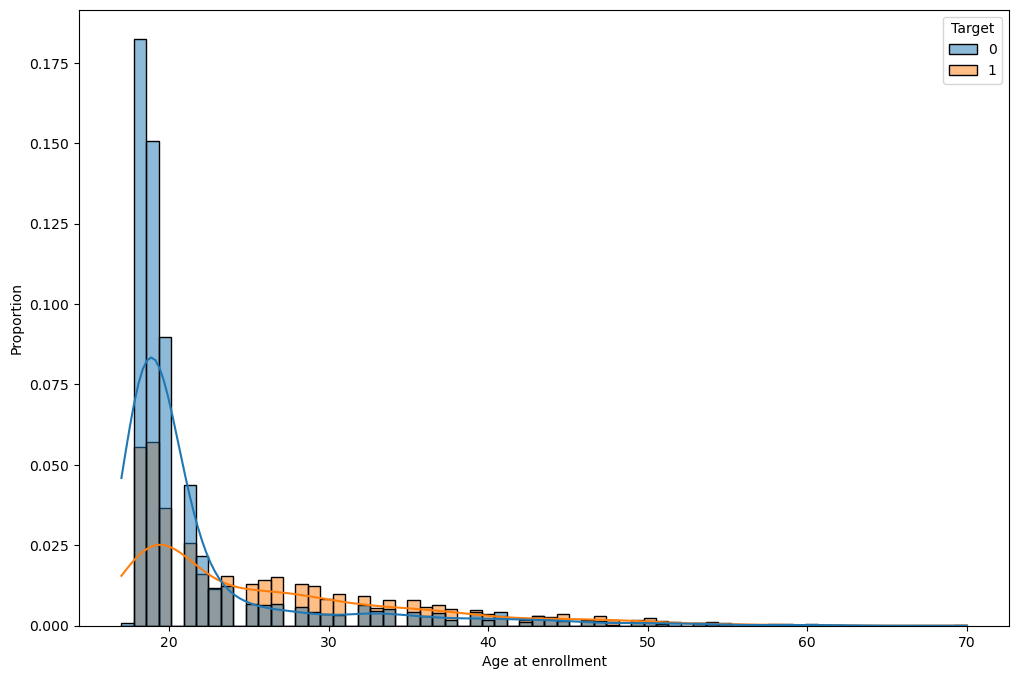

In [101]:
x, y, hue = "Age at enrollment", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Assuming student_data_filt is your DataFrame
g = sns.histplot(data=student_data_filt, x=x, hue=hue, stat='proportion', multiple="layer", kde=True)

g.figure.set_size_inches(12, 8)
plt.show()

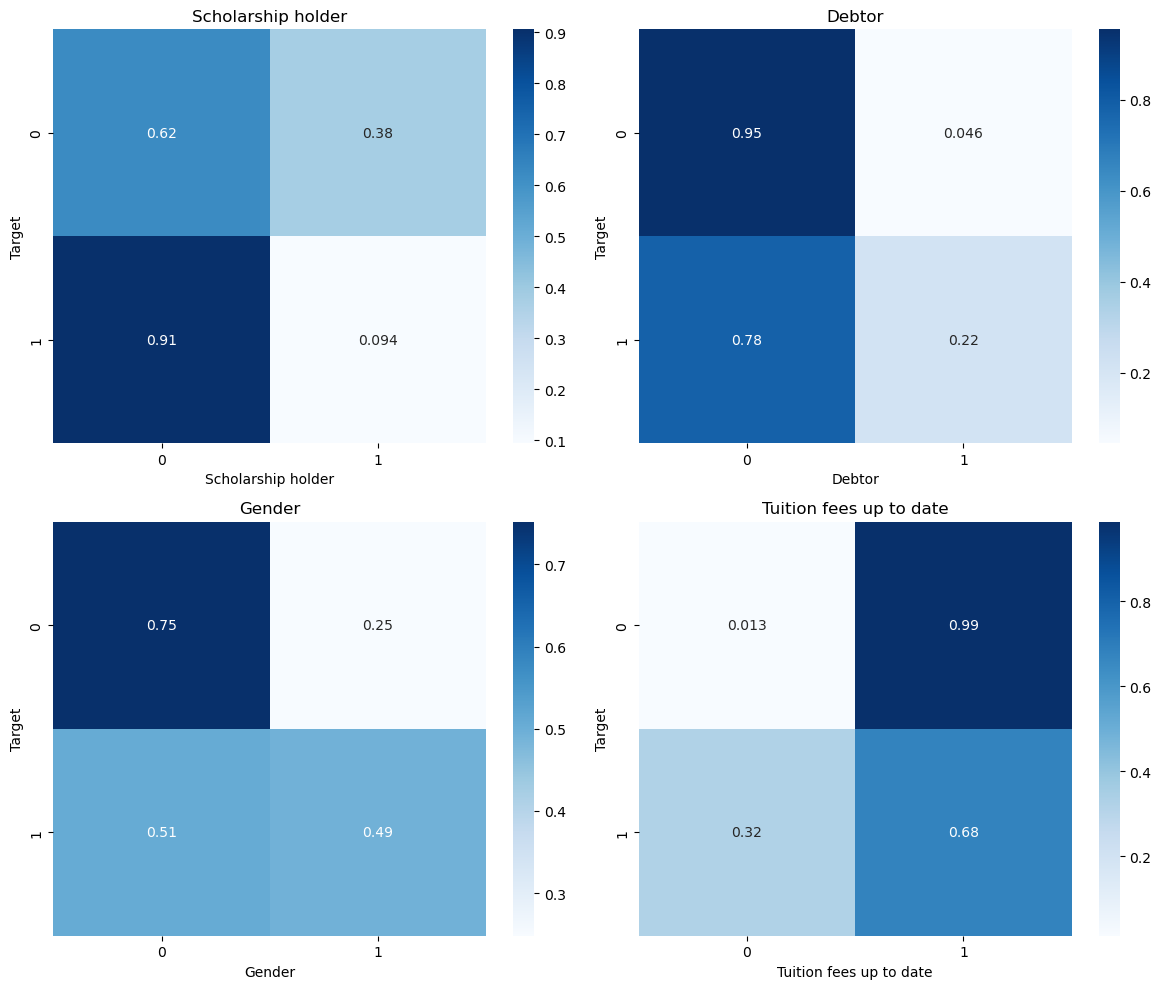

In [107]:

# Define the contingency tables
contingency_tables = [
    ('Scholarship holder', pd.crosstab(student_data_filt['Target'], student_data_filt['Scholarship holder'])),
    ('Debtor', pd.crosstab(student_data_filt['Target'], student_data_filt['Debtor'])),
    ('Gender', pd.crosstab(student_data_filt['Target'], student_data_filt['Gender'])),
    ('Tuition fees up to date', pd.crosstab(student_data_filt['Target'], student_data_filt['Tuition fees up to date']))
]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Loop through each contingency table and plot the heatmap
for (col_name, contingency_table), ax in zip(contingency_tables, axs):
    normalized_table = pd.crosstab(student_data_filt['Target'], student_data_filt[col_name], normalize='index')
    sns.heatmap(normalized_table, annot=True, cmap='Blues', ax=ax)
    ax.set_title(col_name)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

summary: 

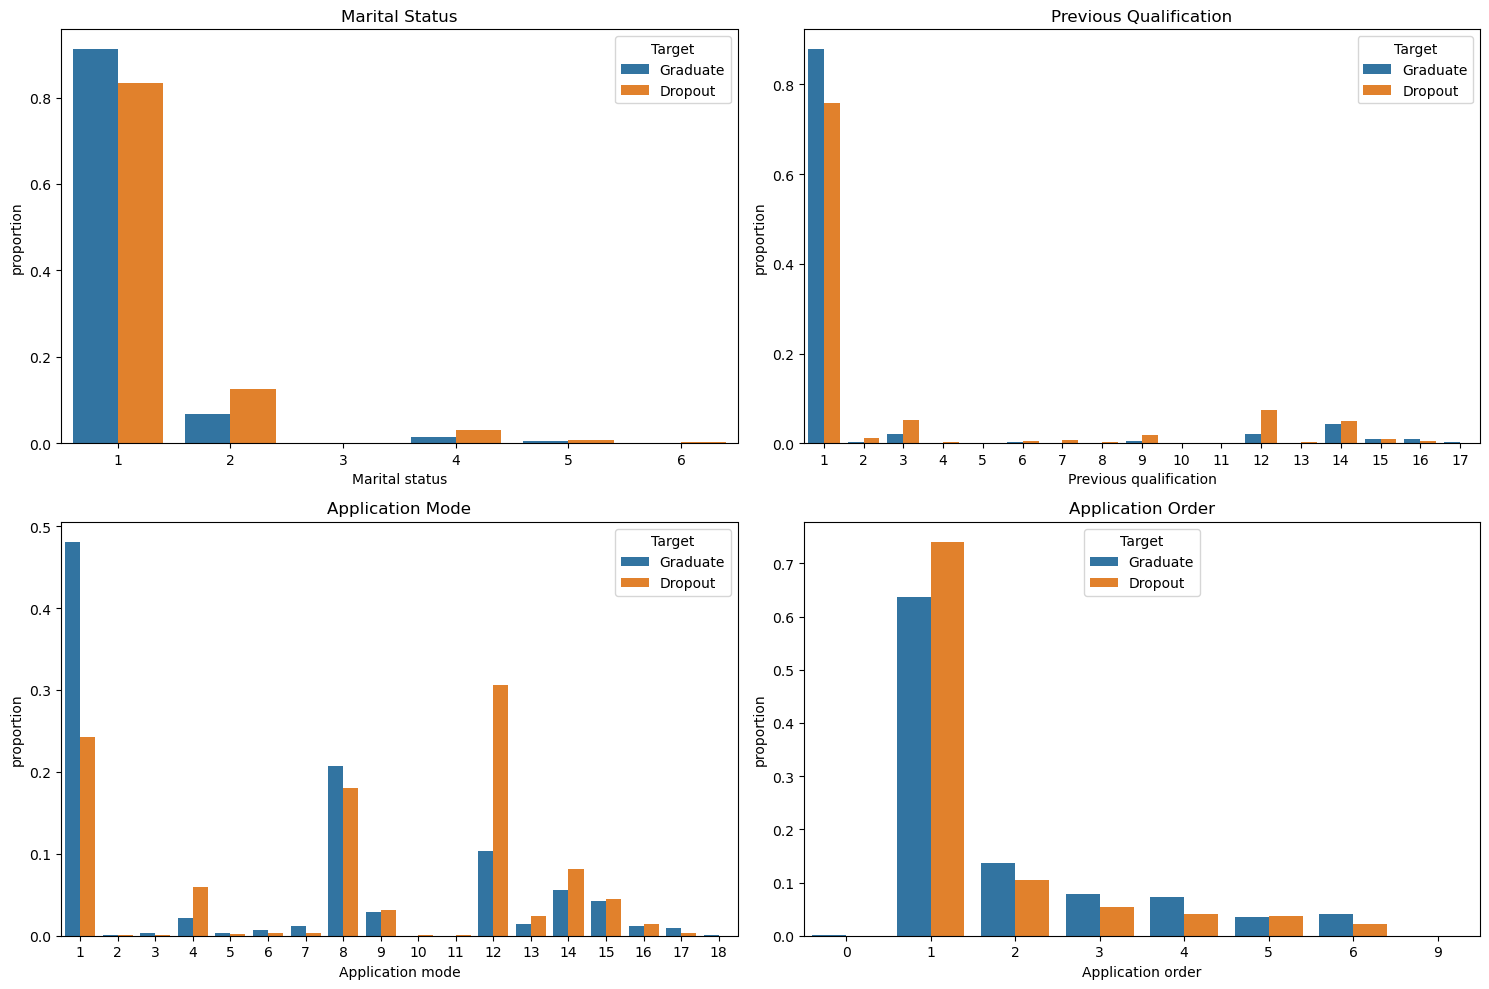

In [100]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First subplot
x, y, hue = "Marital status", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[0, 0])
g.set_title("Marital Status")

# First subplot
x, y, hue = "Previous qualification", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[0, 1])
g.set_title("Previous Qualification")

# Third subplot
x, y, hue = "Application mode", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[1, 0])
g.set_title("Application Mode")

# Fourth subplot
x, y, hue = "Application order", "proportion", "Target"
hue_order = ["Graduate", "Dropout"]

# Load the data for the first subplot
data = (student_data[x].groupby(student_data[hue])
        .value_counts(normalize=True).rename(y).reset_index())

g = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axes[1, 1])
g.set_title("Application Order")

plt.tight_layout()
plt.show()

Summary: 

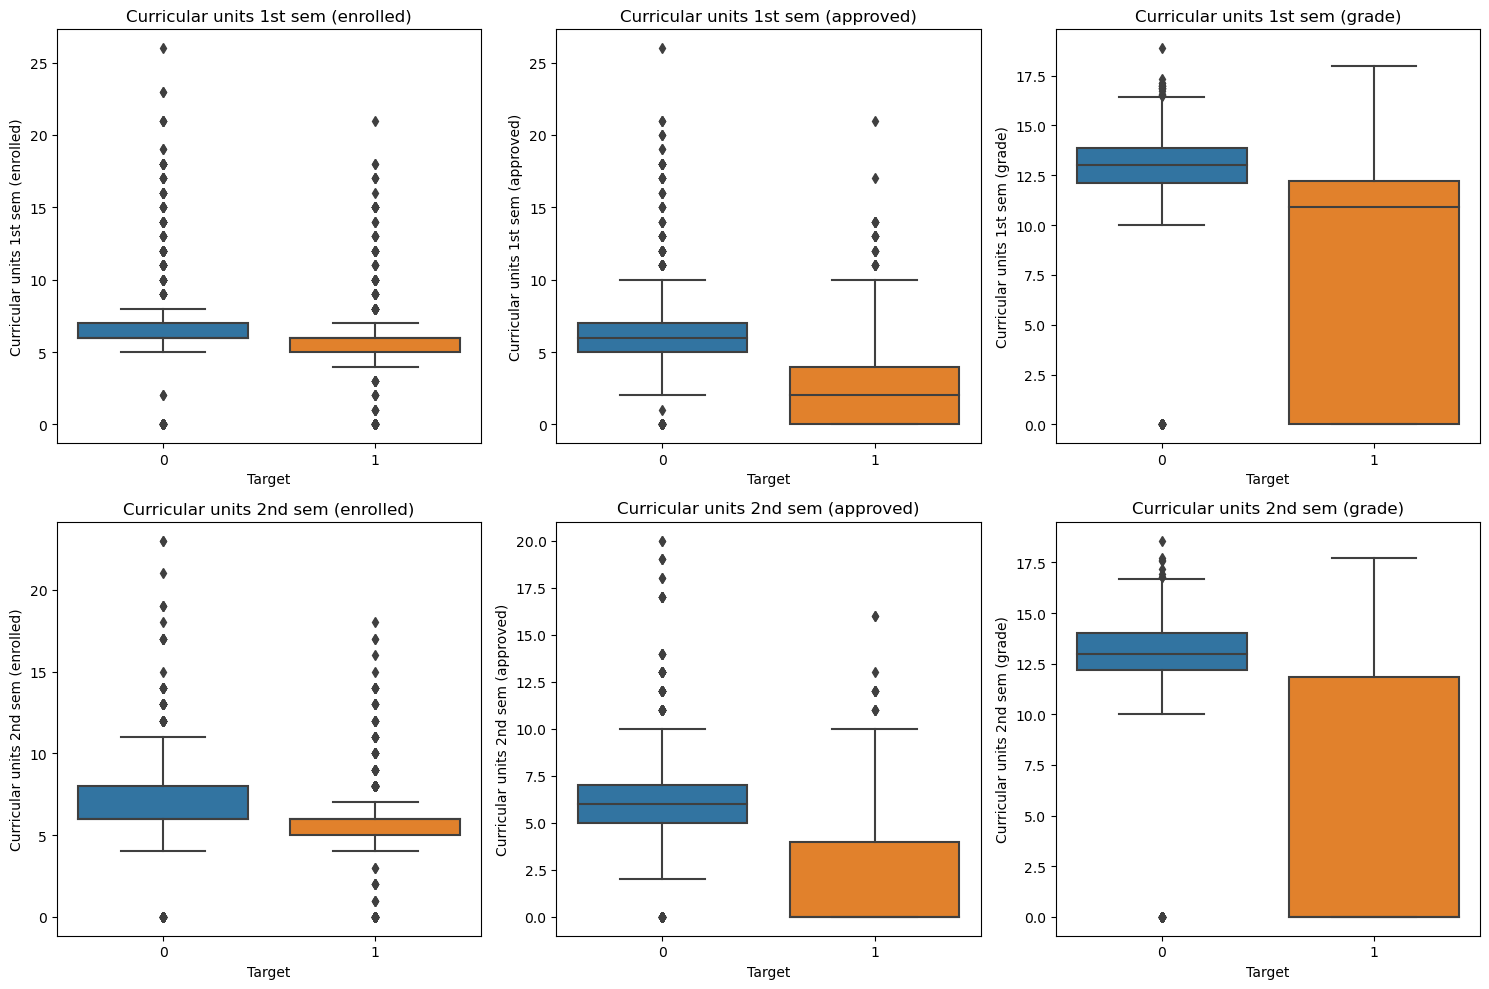

In [39]:
target_cols = [
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

data = student_data_filt[['Target'] + target_cols].copy(deep=False)


# Create a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Iterate over target columns and corresponding subplot axes
for i, (target_col, ax) in enumerate(zip(target_cols, axs)):
    sns.boxplot(data=data, x='Target', y=target_col, ax=ax)
    ax.set_title(target_col)  # Set subplot title

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

summary: